### Librerias

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
from sklearn.linear_model import LinearRegression

### 1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|


In [ ]:
df = pd.DataFrame({'Entrenamiento': np.arange(0,6),
'X_1': np.arange(0,6),
'Y': np.arange(0,6)}) #Creo el dataframe con los datos dados usando pandas
df

,Entrenamiento,X_1,Y
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4
5,5,5,5


### 2. Crear una función para calcular la función de coste.

In [ ]:
def coste(theta_0,theta_1,X_1,Y):
  m = len(Y)
  h = theta_0+ theta_1 * X_1
  J = (1/2*m) * np.sum(h - Y)**2 #Función de coste
  return J

### 3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$.

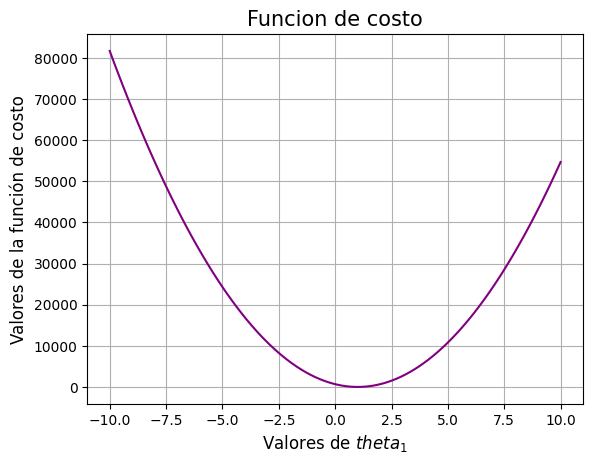

In [ ]:
theta_0 = 0
valores_theta_1 = np.linspace(-10,10,100) #Diferentes valores de theta1
X = df['X_1']
Y = df['Y']
valores_coste = [coste(theta_0,theta_1,X,Y) for theta_1 in valores_theta_1] #Lista para los valores de costo
plt.plot(valores_theta_1, valores_coste, color ='purple')
plt.title("Funcion de costo", fontsize=15)
plt.xlabel("Valores de $theta_1$", fontsize=12)
plt.ylabel("Valores de la función de costo", fontsize=12)
plt.grid()
plt.show()


### Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.

In [ ]:
min_costo = np.argmin(valores_coste) #Para calcular el valor minimo
min_theta_1 = valores_theta_1[min_costo]
valor_min_costo = valores_coste[min_costo]
print("El valor mínimo de la función de costo es", np.round(valor_min_costo,3))

El valor mínimo de la función de costo es 5.579


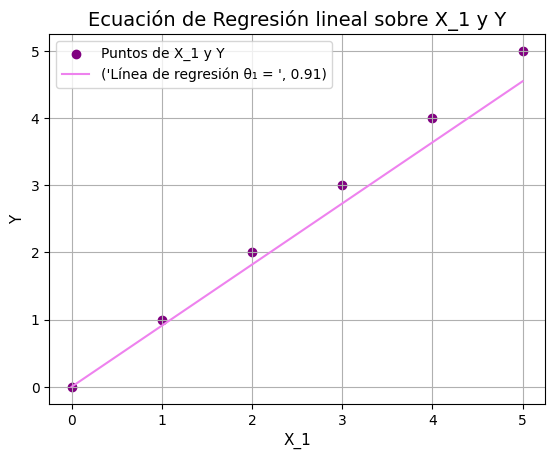

In [ ]:
plt.scatter(X, Y, color='purple', label='Puntos de X_1 y Y')
plt.plot(X, min_theta_1 * X, color='violet', label=("Línea de regresión θ₁ = " ,np.round(min_theta_1,2)))
plt.xlabel('X_1',fontsize=11)
plt.ylabel('Y',fontsize=11)
plt.title('Ecuación de Regresión lineal sobre X_1 y Y', fontsize=14)
plt.grid()
plt.legend()
plt.show()

####4.Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```


En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica, análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo se esta realizados  de esta manera, por motivos didácticos.

In [ ]:
df1 = pd.DataFrame({'Entrenamiento': np.arange(0,6),
'Y': np.arange(0,6),
'X_1': np.arange(0,6)})
df1

,Entrenamiento,Y,X_1
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4
5,5,5,5


In [ ]:
def coste1(theta_0,theta_1,Y,X_1):
  m = len(X_1)
  h = theta_0+ theta_1 * Y
  J = (1/2*m) * np.sum(h - X_1)**2
  return J

In [ ]:
theta_0_ = np.linspace(-10, 10, 100)
theta_1_ = np.linspace(-10, 10, 100)
vector_theta_0, vector_theta_1 = np.meshgrid(theta_0_, theta_1_) #Me sirve para vectorizar el theta0 y theta1

X = df['Y']
Y = df['X_1']
J = np.zeros(vector_theta_0.shape)

for i in range(len(theta_0_)):
    for j in range(len(theta_1_)):
        J[i, j] = coste1(vector_theta_0[i, j], vector_theta_1[i, j], X, Y)


Text(0.5, 0.92, 'Función de costo usando los métodos surface y contour')

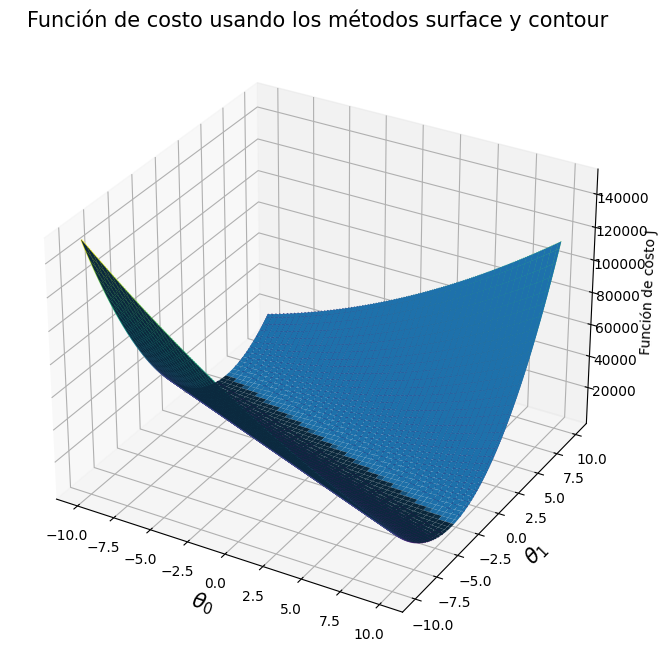

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(vector_theta_0, vector_theta_1, J)
ax.contour(vector_theta_0, vector_theta_1, J, 200,linestyles="solid")
ax.set_xlabel('$\\theta_0$',fontsize=15)
ax.set_ylabel('$\\theta_1$',fontsize=15)
ax.set_zlabel('Función de costo J')
ax.set_title('Función de costo usando los métodos surface y contour', fontsize=15)

####5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.


$$
h_{\theta}(x) = \theta_1 x
$$

$$
J(\theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2
$$

$$
h_{\theta}(x) = \theta_0 + \theta_1 x
$$

$$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2
$$

# Gradiente Descendente


Para determinar el mínimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:

- Proponer un número aleatorios inicial $\omega_i$
- Para descender al mínimo de la función, encontremos un  valor para el cual
el deriva de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo.

- Evaluar $f(\omega_{i+1})$

- Iterar hasta encontrar el mínimo de la función


#### 6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$

In [ ]:
def GradienteDescendente(f, derivada, alpha, theta0=None, epsilon=1e-4, N=1000):
    if theta0 is None:
        theta0 = np.random.randn()

    theta = theta0
    for i in range(N):
        gradiente = derivada(theta) #El gradiente seria la derivada de la funcion evaluada en el punto
        nuevo_theta = theta - alpha * gradiente

        #Condición de parada
        if abs(nuevo_theta - theta) < epsilon:
            print(f"Convergencia alcanzada después de {i} iteraciones.")
            break

        theta = nuevo_theta  #Se actualiza el theta para una nueva iteracion

    return theta, i

f = lambda x: (x - 4)**2
f_prima = lambda x: 2 * (x - 4)
print(f'Para alpha = 0.05 {GradienteDescendente(f,f_prima,0.05)}')
print(f'Para alpha = 0.005 {GradienteDescendente(f,f_prima,0.005)}')
print(f'Para alpha = 0.01 {GradienteDescendente(f,f_prima,0.01)}')

Convergencia alcanzada después de 81 iteraciones.
Para alpha = 0.05 (3.9990905489352424, 81)
Convergencia alcanzada después de 631 iteraciones.
Para alpha = 0.005 (3.990070874052097, 631)
Convergencia alcanzada después de 341 iteraciones.
Para alpha = 0.01 (3.995095173502579, 341)


####7. Para responder este punto puede consultar la siguiente  página y seguir el video[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.


In [ ]:
f = lambda th: np.sin((1/2) * th[0]**2 - (1/4) * th[1]**2 + 3) * np.cos(2 * th[0] + 1 - np.exp(th[1])) #según el video visto

res = 100
_X =np.linspace(-2,2,res)
_Y =np.linspace(-2,2,res)
_Z = np.zeros((res,res))

for ix, x in enumerate(_X): #recorre la lista _x y guarda en ix el indice y en x el valor
  for iy, y in enumerate(_Y):
    _Z[iy,ix] = f([x,y])


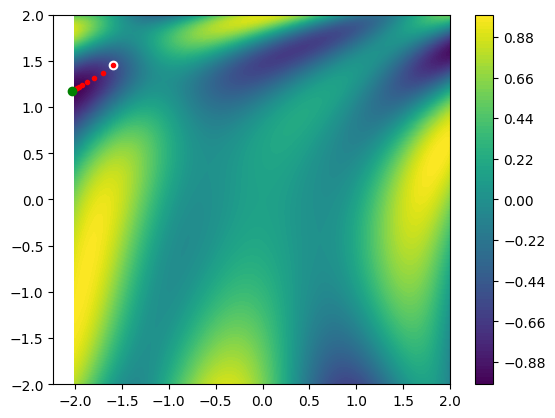

In [ ]:
plt.contourf(_X,_Y,_Z, 100)
plt.colorbar()
theta = np.random.rand(2) * 4 - 2

_T = np.copy(theta)
h = 0.001
lr = 0.001
gradiente = np.zeros(2)

plt.plot(theta[0],theta[1],'o', c= 'white')

for _ in range(10000):
  for it, th in enumerate(theta):

    _T = np.copy(theta)
    _T[it] = _T[it] + h

    derivada = (f(_T) - f(theta)) / h

    gradiente[it] = derivada

  theta = theta - lr * gradiente


  if (_ %100 == 0):
    plt.plot(theta[0],theta[1],'.',c='red')



plt.plot(theta[0],theta[1],'o',color="green")
plt.show()


# Modelo de *machine learning*: Solución general

Un modelo general para solucionar un problema de machinine learning puede ser estructurado como sigue:


a. Eliger el modelo a emplear:
\begin{equation}
h(X,\Theta)
\end{equation}

- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:

    \begin{equation}
    h(X) = (\theta_0 + \theta_1 X)
    \end{equation}


b. Eligir la funcion de coste :
-  Metrica Ecuclidiana:
\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}
- [Lista de funciones de coste que pueden ser empleadas](https://jmlb.github.io/flashcards/2018/04/21/list_cost_functions_fo_neuralnets/)


c. Aplicar el gradiente descendente iterativamente, hasta encontrar el minimo:  

\begin{equation}
\Delta \vec{\Theta} =  - \alpha \nabla J(\Theta)
\end{equation}



- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:


\begin{equation}
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
\end{equation}

### 8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores,
construya un algorítmo que permita determinar una regresión lineal.


In [ ]:
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)

In [ ]:
def GradienteDescendenteLineal(X, y, alpha, theta_0_inicial=0, theta_1_inicial=0, epsilon=1e-6, N=1000):
    m = len(y)
    theta_0 = theta_0_inicial
    theta_1 = theta_1_inicial

    for _ in range(N):
        predicciones = theta_0 + theta_1 * X

        gradiente_theta_0 = (1 / m) * np.sum(predicciones - y)
        gradiente_theta_1 = (1 / m) * np.sum((predicciones - y) * X)

        nuevo_theta_0 = theta_0 - alpha * gradiente_theta_0
        nuevo_theta_1 = theta_1 - alpha * gradiente_theta_1


        if abs(nuevo_theta_0 - theta_0) < epsilon and abs(nuevo_theta_1 - theta_1) < epsilon:
            break

        theta_0 = nuevo_theta_0
        theta_1 = nuevo_theta_1

    return theta_0, theta_1


Los valores óptimos son theta_0 = 0.211 y theta_1 = 0.198


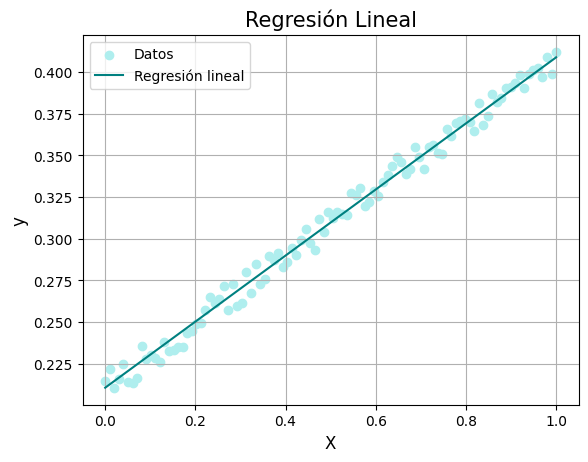

In [ ]:
theta_0, theta_1 = GradienteDescendenteLineal(X, y, alpha=0.05)

print(f"Los valores óptimos son theta_0 = {np.round(theta_0,3)} y theta_1 = {np.round(theta_1,3)}")

plt.scatter(X, y, label='Datos', color="paleturquoise")
plt.plot(X, theta_0 + theta_1 * X, label='Regresión lineal', color='teal')
plt.title('Regresión Lineal', fontsize = 15)
plt.xlabel('X',fontsize =12)
plt.ylabel('y',fontsize =12)
plt.legend()
plt.grid()
plt.show()


### 9. Compare su resultado empleando la libreria linearRegresion() de sklearn.

In [ ]:
X_reshaped = X.reshape(-1, 1)

mod_sklearn = LinearRegression()
mod_sklearn.fit(X_reshaped, y)
theta_0_sklearn = mod_sklearn.intercept_
theta_1_sklearn = mod_sklearn.coef_[0]

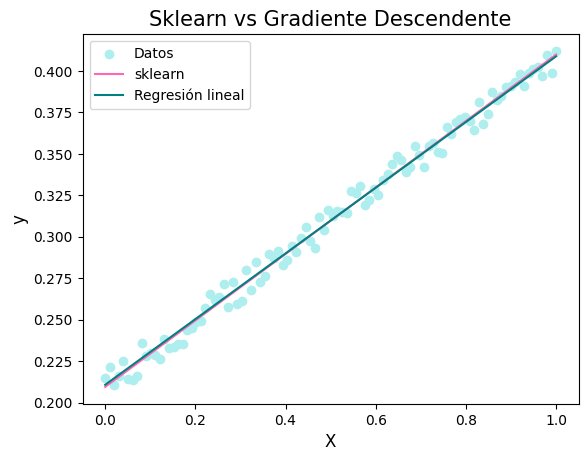

In [ ]:
plt.scatter(X, y, label='Datos', color='paleturquoise')
plt.plot(X, theta_0_sklearn + theta_1_sklearn * X, color='hotpink', label='sklearn') #linea de regresión usando sklearn
plt.plot(X, theta_0 + theta_1 * X, label='Regresión lineal', color='teal') #linea de regresión usando gradiente descendente
plt.title('Sklearn vs Gradiente Descendente', fontsize=15)
plt.xlabel('X',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.legend()
plt.show()

Finalmente se puede notar que el gradiente descente lineal tiene una muy buena aproximación comparado con la relacion lineal de la librería sklearn